In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests
import time
from config import api_key

In [2]:
#Import CSV file, and read into DataFrame.

world_data = pd.read_csv("raw_data/worldcities.csv")

#Preview the data.
world_data.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [3]:
# Randomly select 500 cities for weather data.

selected_cities = world_data.sample(n=500)

#Visualize the selected cities DataFrame.

selected_cities

,Country,City,Latitude,Longitude
41178,ua,bobrovytsya,50.746927,31.394802
14630,gt,san martin sacatepequez,14.816667,-91.650000
7597,cr,matina,10.076088,-83.289527
26164,np,ilam,26.900000,87.933333
28343,ph,ipil,9.790700,125.438600
16560,id,ungaran,-7.139722,110.405000
31750,pt,rabo de peixe,37.800000,-25.583333
31405,pl,wladyslawowo,54.791759,18.403942
34429,ro,targu carbunesti,44.950000,23.516667
15202,hn,sula,15.250000,-88.566667


In [4]:
#Counter

row_count = 0

# Create blank columns for the necessary fields.

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

# Loop through and get the weather data using the Open Weather API.

for index, row in selected_cities.iterrows():
    #Sleep to help with the call limit
    
    #time.sleep(1)
    
    #Open weather url.
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    #Print log to ensure the loop is working correctly.
    
    print("Now retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    #Run requests to grab the JSON at the requested URL
    
    city_weather = requests.get(query_url).json()
    
    
    #print(row["Latitude"],row["Longitude"])
#print(city_weather.keys())
    
    #Append the weather data to the appropriate columns.
    #Use try/except to skip any cities with errors.
    #selected_cities.append(requests.get(query_url + str(city_weather)).json())
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")
        #continue

Now retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=50.746927&lon=31.394802000000002&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial


/Users/bencrutchfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/bencrutchfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/bencrutchfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/bencrutchfield/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=14.816667&lon=-91.65&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=10.076088&lon=-83.289527&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=26.9&lon=87.9333333&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=9.7907&lon=125.4386&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=-7.139722&lon=110.405&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=37.8&lon=-25.583333&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 7
https://api.openweathermap.org/data/2.5/weather?lat=54.791759&lon=18.403942

Now retieving city # 54
https://api.openweathermap.org/data/2.5/weather?lat=47.363569&lon=0.739933&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 55
https://api.openweathermap.org/data/2.5/weather?lat=14.966667000000001&lon=-91.733333&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 56
https://api.openweathermap.org/data/2.5/weather?lat=43.708056&lon=142.039167&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 57
https://api.openweathermap.org/data/2.5/weather?lat=40.368055600000005&lon=69.3252778&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 58
https://api.openweathermap.org/data/2.5/weather?lat=7.8791667&lon=-10.7877778&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 59
https://api.openweathermap.org/data/2.5/weather?lat=-9.66078&lon=20.391553&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 60
https://api.openweathermap.org/

Now retieving city # 107
https://api.openweathermap.org/data/2.5/weather?lat=33.704387&lon=8.969033999999999&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 108
https://api.openweathermap.org/data/2.5/weather?lat=24.033333&lon=76.56666700000001&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 109
https://api.openweathermap.org/data/2.5/weather?lat=55.835955000000006&lon=48.658201&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 110
https://api.openweathermap.org/data/2.5/weather?lat=49.53611110000001&lon=5.893055599999999&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 111
https://api.openweathermap.org/data/2.5/weather?lat=25.333333&lon=73.0&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 112
https://api.openweathermap.org/data/2.5/weather?lat=53.248456000000004&lon=46.258235&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 113


Now retieving city # 160
https://api.openweathermap.org/data/2.5/weather?lat=42.8675&lon=130.358056&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 161
https://api.openweathermap.org/data/2.5/weather?lat=45.616667&lon=25.683332999999998&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 162
https://api.openweathermap.org/data/2.5/weather?lat=16.0503&lon=120.5926&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 163
https://api.openweathermap.org/data/2.5/weather?lat=56.733332999999995&lon=37.65&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 164
https://api.openweathermap.org/data/2.5/weather?lat=40.948833&lon=-8.6213&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 165
https://api.openweathermap.org/data/2.5/weather?lat=44.721107&lon=39.879184&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 166
https://api.openweathermap.org/data/2

Now retieving city # 212
https://api.openweathermap.org/data/2.5/weather?lat=38.6911111&lon=-121.4475&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 213
https://api.openweathermap.org/data/2.5/weather?lat=44.735&lon=21.195556&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 214
https://api.openweathermap.org/data/2.5/weather?lat=15.8227&lon=120.3295&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 215
https://api.openweathermap.org/data/2.5/weather?lat=42.7469444&lon=-84.4011111&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 216
https://api.openweathermap.org/data/2.5/weather?lat=43.396111&lon=43.731667&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 217
https://api.openweathermap.org/data/2.5/weather?lat=60.1&lon=19.95&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 218
https://api.openweathermap.org/data/2.5/weather?lat=-27.

Now retieving city # 265
https://api.openweathermap.org/data/2.5/weather?lat=-18.9166667&lon=47.8&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 266
https://api.openweathermap.org/data/2.5/weather?lat=18.457222&lon=-96.347778&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 267
https://api.openweathermap.org/data/2.5/weather?lat=14.866667000000001&lon=-91.93333299999999&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 268
https://api.openweathermap.org/data/2.5/weather?lat=31.344444399999997&lon=-109.54472220000001&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 269
https://api.openweathermap.org/data/2.5/weather?lat=9.285&lon=105.72444399999999&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 270
https://api.openweathermap.org/data/2.5/weather?lat=7.85&lon=9.783333&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 271
https://api

Now retieving city # 318
https://api.openweathermap.org/data/2.5/weather?lat=44.983333&lon=7.466667&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 319
https://api.openweathermap.org/data/2.5/weather?lat=53.433333&lon=-1.35&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 320
https://api.openweathermap.org/data/2.5/weather?lat=38.55&lon=21.2333333&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 321
https://api.openweathermap.org/data/2.5/weather?lat=15.6036&lon=120.823&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 322
https://api.openweathermap.org/data/2.5/weather?lat=47.2152778&lon=-123.09944440000001&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 323
https://api.openweathermap.org/data/2.5/weather?lat=34.434844&lon=132.740622&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 324
https://api.openweathermap.org/data/2.5/weath

Now retieving city # 371
https://api.openweathermap.org/data/2.5/weather?lat=49.516667&lon=-96.68333299999999&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 372
https://api.openweathermap.org/data/2.5/weather?lat=47.936113&lon=38.936607&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 373
https://api.openweathermap.org/data/2.5/weather?lat=17.64111&lon=121.800148&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 374
https://api.openweathermap.org/data/2.5/weather?lat=28.5&lon=-106.75&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 375
https://api.openweathermap.org/data/2.5/weather?lat=14.087759&lon=120.970977&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 376
https://api.openweathermap.org/data/2.5/weather?lat=9.6531&lon=123.4344&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 377
https://api.openweathermap.org/data/2.5/weathe

Now retieving city # 424
https://api.openweathermap.org/data/2.5/weather?lat=14.966667000000001&lon=-91.216667&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 425
https://api.openweathermap.org/data/2.5/weather?lat=41.5227778&lon=44.353333299999996&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 426
https://api.openweathermap.org/data/2.5/weather?lat=-30.111110999999998&lon=-51.316666999999995&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 427
https://api.openweathermap.org/data/2.5/weather?lat=34.883333&lon=135.8&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 428
https://api.openweathermap.org/data/2.5/weather?lat=27.319444&lon=110.10305600000001&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 429
https://api.openweathermap.org/data/2.5/weather?lat=62.224722&lon=40.253889&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 430


Now retieving city # 476
https://api.openweathermap.org/data/2.5/weather?lat=49.128056&lon=8.583611&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 477
https://api.openweathermap.org/data/2.5/weather?lat=48.133333&lon=11.366667&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 478
https://api.openweathermap.org/data/2.5/weather?lat=9.516667&lon=77.633333&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 479
https://api.openweathermap.org/data/2.5/weather?lat=14.95&lon=-91.45&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 480
https://api.openweathermap.org/data/2.5/weather?lat=32.929731&lon=72.415829&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 481
https://api.openweathermap.org/data/2.5/weather?lat=51.083333&lon=2.9666669999999997&appid=b6ae6c3480acf180986a948a0304bbdc&units=Imperial
Now retieving city # 482
https://api.openweathermap.org/data/2.5/weath

In [5]:
selected_cities#["Temperature"]

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
41178,ua,bobrovytsya,50.746927,31.394802,60.8,63,0,4.47
14630,gt,san martin sacatepequez,14.816667,-91.650000,80.6,88,90,9.17
7597,cr,matina,10.076088,-83.289527,86,74,75,4.7
26164,np,ilam,26.900000,87.933333,63.56,100,92,1.23
28343,ph,ipil,9.790700,125.438600,82.46,98,64,1.74
16560,id,ungaran,-7.139722,110.405000,71.48,85,8,3.76
31750,pt,rabo de peixe,37.800000,-25.583333,60.8,72,75,6.93
31405,pl,wladyslawowo,54.791759,18.403942,64.4,68,0,2.24
34429,ro,targu carbunesti,44.950000,23.516667,57.08,84,0,3.02
15202,hn,sula,15.250000,-88.566667,89.6,62,20,6.93


In [6]:
selected_cities.to_csv("WorldWeatherData.csv", index=False)

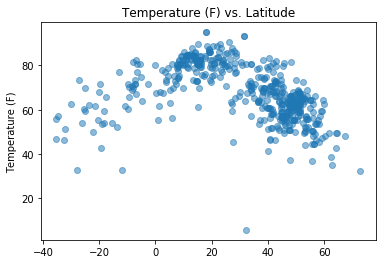

In [7]:
plt.scatter(selected_cities["Latitude"],selected_cities["Temperature"], alpha = 0.5)

plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

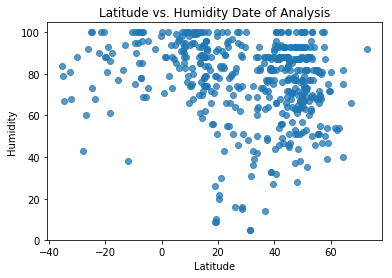

In [8]:
plt.scatter(selected_cities["Latitude"],selected_cities["Humidity"], alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

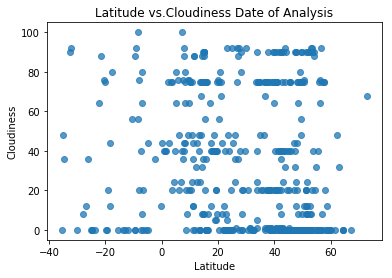

In [9]:

plt.scatter(selected_cities["Latitude"],selected_cities["Cloudiness"], alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

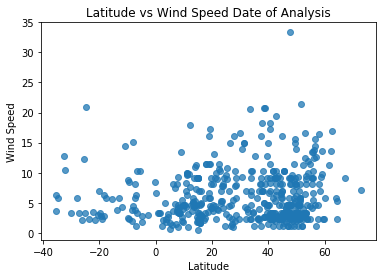

In [10]:
plt.scatter(selected_cities["Latitude"],selected_cities["Wind Speed"], alpha= 0.75)
plt.title("Latitude vs Wind Speed Date of Analysis")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

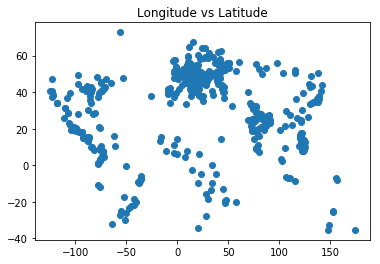

In [11]:
plt.scatter(selected_cities["Longitude"],selected_cities["Latitude"])
plt.title("Longitude vs Latitude")
plt.show()

In [ ]:
#Analysis
print("There is a relatively strong correlation bewteen latitude and temperature. The lower latitudes have higher temperatures and the higher latitudes have lower temperatures.")
print("The correlation between humidity and latitude is very weak.")
print("There is almost no correlation between cloudiness and latitude.")
print("The correlation between latitude and wind speed is very weak.")